_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Litter Traps & Public BBQ - Reduce Melbourn River litter near public BBQ's</div>

<div class="usecase-authors"><b>Authored by: </b> Tharusha Cao, Thomas Warren  </div>

<div class="usecase-duration"><b>Duration:</b> 180 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Beginner</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<div class="usecase-section-header">Scenario</div>

### Scenario ###

City of Melbourne's Open datasets include include the geographic locations of cafes, public BBQ areas, and litter traps within the municipality. The analysis of such datasets is not just an academic exercise; it has practical implications for urban planning, environmental sustainability, and enhancing the quality of urban life.

### Project Goal ###

In our urban spaces, the distribution and interplay of amenities like cafes, public BBQ areas, and environmental facilities such as litter traps are key drivers of a city's impact on its environment. Given these datasets are separated and City of Melbourne (CoM) standards are not publically available, we hypothesis that these issues are silos in development application considerations. 

Our goal is to conduct a comprehensive proximity analysis to understand how these entities coexist and influence each other. We aim to examine changes in behaviour over time, with a specific focus on cafes, as our dataset includes temporal data for these establishments, unlike the static data for litter traps and BBQ areas. 




1. As a City PLanner i want to ensure the future development will make sure less pollution on the river

2. As a Citizen i want to enjoy a clean view and non polluted water while still be able to enjoy outdoor activities


### Learning Opporutinities ###

*Data Analysis and Visualization Skills*:

* Develop proficiency in data analysis techniques such as clustering, time series analysis, and geospatial analysis.
* Learn to visualize complex data in a way that is accessible and informative, using tools like GIS software, Python libraries (e.g., Matplotlib, Seaborn), and data visualization platforms.

*Environmental Impact Assessment*:

 * Understand the environmental implications of urban amenities.
 * Learn how litter traps can be used to mitigate pollution and the importance of strategic placement in urban settings.
 * Study the relationship between public amenities and environmental sustainability.

*Statistical and Predictive Modelling*:

 * Gain experience in applying statistical models to real-world data.
 * Learn about predictive modeling and forecasting techniques, which are essential in planning and decision-making processes.

*Socioeconomic Dynamics*:

 * Explore how the distribution of cafes and BBQ areas relates to socioeconomic factors.
 * Understand the role of public amenities in community building and social dynamics.

*Machine Learning Applications*:

 * Apply machine learning techniques for predictive analysis and clustering.
 * Learn about practical applications of machine learning in urban studies.

### Outcomes ###

Understanding the evolving landscape of cafe locations and their temporal patterns will provide insights into urban trends and its environmental impact. For our initial models, we plan to employ clustering techniques to identify patterns in the spatial distribution of cafes, BBQ areas, and litter traps. This clustering will help us understand the relationships between these entities and identify areas of high activity or potential neglect.

Furthermore, we will utilise time series analysis for forecasting future trends in cafe locations and their potential impacts. This analysis will be crucial in predicting shifts in urban dynamics, which could guide city planners and environmental managers in making informed decisions about resource allocation, urban planning, and environmental protection strategies.

By blending spatial analysis with time series forecasting, we aim to uncover patterns and trends that are not immediately apparent, providing a richer understanding of how our urban spaces evolve and how they can be managed more effectively for the benefit of the community and the environment.

At the end of this use case you will:

- Find if more litter traps are needed
- Learn data analysis

### Techniques To Be Used ###

*Proximity Analysis*:

This technique will help us understand the spatial relationships between cafes, BBQ areas, and litter traps. By calculating distances and examining the geographical closeness of these features, we can assess how they might influence each other. For instance, we can explore if cafes are commonly located near public BBQ areas or if litter traps are strategically placed around these social hubs.

*Clustering Analysis*:

Using clustering algorithms such as K-means, we can group similar data points based on certain features, like location or type. This will allow us to identify patterns in the spatial distribution of cafes, BBQ areas, and litter traps. Clusters may reveal areas with high concentrations of these amenities, helping in understanding their distribution across the urban landscape.

*Time Series Analysis*:

Since our dataset includes temporal data for cafes, time series analysis will be crucial. We will examine trends and patterns over time, such as the growth or decline in the number of cafes. Techniques like ARIMA (AutoRegressive Integrated Moving Average) or LSTM (Long Short-Term Memory networks) can be used for forecasting future trends. This analysis will help in predicting how cafe culture might evolve and its potential impact on urban spaces.


<div class="usecase-section-header">Increase in river and city pollution?</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

In [3]:
###################################################################
# Libraries used:
###################################################################
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import requests
import math
from geopy.distance import geodesic

In [3]:
# Function that extracts the data from the JSON 
def get_data(base, data_url, offset = 0):
    key = open('Key.txt','r')
    APIkey = key.read()
    filters = f'records?limit={100}&offset={offset}&timezone=UTC'
    url = f'{base}{data_url}/{filters}'
    result = requests.get(url)
    # if you need to extract more than 9900 records, enter the api key like below
    result = requests.get(url + f'&apikey={APIkey}')
    result_json = result.json()
    max_results = result_json['total_count']
    links = result_json['links']
    records = result_json['records']
    records_df = pd.json_normalize(records)
    
    # fix columns names
    records_df.drop(columns=['links'],inplace=True)
    column_names = records_df.columns.values.tolist()
    
    column_names = [i.split('.')[-1] for i in column_names]
    records_df.columns = column_names
    
    next_url = None
    
    # get next url
    if records_df.shape[0] != max_results:
        for l in links:
            if l['rel']=='next':
                next_url = l['href']
                
    return [records_df, next_url, column_names]

In [4]:
# Appends each set of data 
def add_to_dataframe(dataframe, new_data):
    df = pd.concat([dataframe, new_data])
    return df

In [5]:

# Extracts the data from the url to produce a pandas dataset
def extract_dataframe(dataset):
    df_new, url_next, column_names = get_data(base_url, dataset)
    df = pd.DataFrame(columns=column_names)
    while url_next != None:
        df_new, url_next, column_names = get_data(base_url, dataset, df.shape[0])
        df = add_to_dataframe(df, df_new)
        # This limits the dataset to only 9900 entries, should be removed if you want to import more data
        # To get more than 9900, enter the API key in the get data function
        if df.shape[0] == 9900:
            break
    return df

In [6]:
# Base url for v2 api
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.0/catalog/datasets/'

# A filter at the end of the url
number_of_records = 100
filters = f'records?limit={number_of_records}&offset=0&timezone=UTC'

# The generated url
# dataset_url = f'{base_url}{dataset}/{filters}'

In [7]:
# Call the function and produce a dataframe
#cafe_res_sc_dataframe = extract_dataframe("cafes-and-restaurants-with-seating-capacity")
#public_BBQ_dataframe = extract_dataframe("public-barbecues")
df = extract_dataframe("litter-traps")

In [8]:
if not df.empty:
    first_entry = df.iloc[0]
    print(first_entry)
else:
    print("DataFrame is empty.")


DataFrame is empty.


In [9]:
### TO CHANGE - Manually import datasets

# Manually reading each CSV file from website
linkLitterTraps = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/litter-traps/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
linkPublicBBQ ="https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/public-barbecues/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
linklinkCafeRes = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/cafes-and-restaurants-with-seating-capacity/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
litter_df = pd.read_csv(linkLitterTraps)
bbq_df = pd.read_csv(linkPublicBBQ)
cafe_df = pd.read_csv(linklinkCafeRes)

## Exploratory Data Analysis ##

### Output DataFrames

In [11]:
litter_df

,asset_number,asset_description,construct_material_lupvalue,inspection_frequency,maintained_by,object_type_lupvalue,lat,lon,location
0,1126515,SWD Litter Trap - Queensbridge St,Concrete,Half Yearly,City of Melbourne,Trash Rack,-37.820749,144.962333,"-37.82074917518231, 144.96233287185117"
1,1379350,"SWD Litter Trap - West side Wurundjeri Way, ne...",NaN,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.812671,144.945636,"-37.812671357856935, 144.94563578253997"
2,1516483,SWD Litter Trap - Boyd Community Hub (SOUTHBANK),NaN,NaN,City of Melbourne,Not Known,-37.825490,144.961208,"-37.825490336480286, 144.9612080150195"
3,1126533,SWD Litter Trap - Cumberland St,Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.819900,144.942754,"-37.81990017409475, 144.94275387398454"
4,1432451,"SWD-Litter Trap-East Harbour Esp, cnr La Trobe...",Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.815349,144.945348,"-37.81534931155489, 144.94534809647914"
...,...,...,...,...,...,...,...,...,...
58,1126529,SWD Litter Trap-South east side Bourke St at H...,Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.818920,144.947170,"-37.81891982191636, 144.9471703182558"
59,1378102,SWD Litter Trap - MP13B - Bayles St,Precast Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.793851,144.955434,"-37.79385095713805, 144.9554336599639"
60,1126528,"SWD Litter Trap - Galada Ave, west pipe",Precast Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.781642,144.940922,"-37.7816423151755, 144.9409221603282"
61,1126507,SWD Litter Trap - Cardigan St,Precast Concrete,Quarterly,City of Melbourne,In Line GPT,-37.806129,144.964626,"-37.806129321325805, 144.96462630105236"


In [12]:
bbq_df

,Description,Co-ordinates
0,Barbeque - Urban Design Single Hotplate,"-37.819821342236914, 144.97480170753713"
1,Barbeque - Fawkner Park Toddler Play Space,"-37.839163364409444, 144.98066702168143"
2,Barbeque - Urban Design Single Hotplate,"-37.78998719902451, 144.94502340388996"
3,Barbeque - Urban Design Single Hotplate,"-37.786978549708806, 144.95295755838"
4,Barbeque - Urban Design Double Hotplate - Waru...,"-37.79622323577933, 144.9266473544793"
...,...,...
58,Barbeque - Urban Design Single Hotplate,"-37.829648035597195, 144.96496602596258"
59,Barbeque - Unknown Barbeque Type,"-37.81889052008494, 144.94275498440427"
60,Barbeque - Urban Design Double Hotplate - Roya...,"-37.79551100378923, 144.9519166390474"
61,Barbeque - Urban Design Double Hotplate Spanni...,"-37.79781159312425, 144.92608154725664"


In [13]:
cafe_df

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Trading name,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,Longitude,Latitude,location
0,2015,850,101101,101101,St Kilda Road MELBOURNE 3004,Melbourne (Remainder),Riverslide Skate Park,"Residence , St Kilda Road MELBOURNE 3004",9113,"Sports and Physical Recreation Venues, Grounds...",Seats - Indoor,6,144.972537,-37.820878,"-37.8208784716, 144.97253691805486"
1,2015,852,101100,101100,Alexandra Avenue MELBOURNE 3004,Melbourne (Remainder),Jardin Tan,"Restaurant , Alexandra Avenue MELBOURNE 3004",4511,Cafes and Restaurants,Seats - Outdoor,207,NaN,NaN,NaN
2,2015,852,101100,101100,Alexandra Avenue MELBOURNE 3004,Melbourne (Remainder),Peter Rowlands Catering,0-0 Alexandra Avenue MELBOURNE 3004,4513,Catering Services,Seats - Indoor,48,NaN,NaN,NaN
3,2015,861,102503,102503,161-173 Domain Road SOUTH YARRA 3141,South Yarra,Cafe Domain,171 Domain Road SOUTH YARRA 3141,4511,Cafes and Restaurants,Seats - Outdoor,42,144.981700,-37.834317,"-37.83431689595, 144.98170002123896"
4,2015,861,102503,102503,161-173 Domain Road SOUTH YARRA 3141,South Yarra,Botanical Hotel,169 Domain Road SOUTH YARRA 3141,4511,Cafes and Restaurants,Seats - Outdoor,22,144.981700,-37.834317,"-37.83431689595, 144.98170002123896"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60050,2019,785,110535,110535,263-329 Lorimer Street PORT MELBOURNE VIC 3207,Port Melbourne,Ocean View Cafe Port Melbourne,"Suite 1, Pier 35 263-329 Lorimer Street PORT M...",4511,Cafes and Restaurants,Seats - Indoor,60,144.904228,-37.825364,"-37.8253639078, 144.90422836884795"
60051,2019,786,602733,110589,1 Phillip Court PORT MELBOURNE VIC 3207,Port Melbourne,Ootoro,"Unit 3, 1 Phillip Court PORT MELBOURNE VIC 3207",4511,Cafes and Restaurants,Seats - Outdoor,24,144.920873,-37.826060,"-37.8260597946, 144.92087320861043"
60052,2019,787,640573,640573,46-62 Cook Street PORT MELBOURNE VIC 3207,Port Melbourne,Red Rooster Westgate,Part 46 Cook Street PORT MELBOURNE VIC 3207,4511,Cafes and Restaurants,Seats - Indoor,40,144.917101,-37.829900,"-37.829899924900005, 144.91710060910307"
60053,2019,788,110639,110639,2 West Gate Freeway PORT MELBOURNE VIC 3207,Port Melbourne,KFC,Part 2 West Gate Freeway PORT MELBOURNE VIC 3207,4511,Cafes and Restaurants,Seats - Indoor,64,144.918602,-37.830991,"-37.8309908537, 144.91860233088727"


In [48]:
litter_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asset_number                 63 non-null     int64  
 1   asset_description            63 non-null     object 
 2   construct_material_lupvalue  56 non-null     object 
 3   inspection_frequency         58 non-null     object 
 4   maintained_by                63 non-null     object 
 5   object_type_lupvalue         59 non-null     object 
 6   lat                          63 non-null     float64
 7   lon                          63 non-null     float64
 8   location                     63 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.6+ KB


In [49]:
bbq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Description   63 non-null     object
 1   Co-ordinates  63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [50]:
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60055 entries, 0 to 60054
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Census year                     60055 non-null  int64  
 1   Block ID                        60055 non-null  int64  
 2   Property ID                     60055 non-null  int64  
 3   Base property ID                60055 non-null  int64  
 4   Building address                60055 non-null  object 
 5   CLUE small area                 60055 non-null  object 
 6   Trading name                    60055 non-null  object 
 7   Business address                60055 non-null  object 
 8   Industry (ANZSIC4) code         60055 non-null  int64  
 9   Industry (ANZSIC4) description  60055 non-null  object 
 10  Seating type                    60055 non-null  object 
 11  Number of seats                 60055 non-null  int64  
 12  Longitude                       

## Drop Missing values

In [14]:
# Handle NaN values in the datasets ## TO BE CHECKED
litter_df.dropna(subset=['lat', 'lon'], inplace=True)
bbq_df.dropna(subset=['Co-ordinates'], inplace=True)
cafe_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [15]:
litter_df.drop(columns=['maintained_by'])

,asset_number,asset_description,construct_material_lupvalue,inspection_frequency,object_type_lupvalue,lat,lon,location
0,1126515,SWD Litter Trap - Queensbridge St,Concrete,Half Yearly,Trash Rack,-37.820749,144.962333,"-37.82074917518231, 144.96233287185117"
1,1379350,"SWD Litter Trap - West side Wurundjeri Way, ne...",NaN,Quarterly,Offset Centrifugal GPT,-37.812671,144.945636,"-37.812671357856935, 144.94563578253997"
2,1516483,SWD Litter Trap - Boyd Community Hub (SOUTHBANK),NaN,NaN,Not Known,-37.825490,144.961208,"-37.825490336480286, 144.9612080150195"
3,1126533,SWD Litter Trap - Cumberland St,Concrete,Quarterly,Offset Centrifugal GPT,-37.819900,144.942754,"-37.81990017409475, 144.94275387398454"
4,1432451,"SWD-Litter Trap-East Harbour Esp, cnr La Trobe...",Concrete,Quarterly,Offset Centrifugal GPT,-37.815349,144.945348,"-37.81534931155489, 144.94534809647914"
...,...,...,...,...,...,...,...,...
58,1126529,SWD Litter Trap-South east side Bourke St at H...,Concrete,Quarterly,Offset Centrifugal GPT,-37.818920,144.947170,"-37.81891982191636, 144.9471703182558"
59,1378102,SWD Litter Trap - MP13B - Bayles St,Precast Concrete,Quarterly,Offset Centrifugal GPT,-37.793851,144.955434,"-37.79385095713805, 144.9554336599639"
60,1126528,"SWD Litter Trap - Galada Ave, west pipe",Precast Concrete,Quarterly,Offset Centrifugal GPT,-37.781642,144.940922,"-37.7816423151755, 144.9409221603282"
61,1126507,SWD Litter Trap - Cardigan St,Precast Concrete,Quarterly,In Line GPT,-37.806129,144.964626,"-37.806129321325805, 144.96462630105236"


## Functions


In [16]:
# Function to calculate the minimum distance from a point to any point in a list
"""
Calculate the minimum geodesic distance from a point to any point in a given list.

Parameters:
point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.

Returns:
float: The minimum Euclidean distance from the given point to the closest point in the list.
"""

def min_distance(point, list_of_points):
    return min([geodesic(point, pt).meters for pt in list_of_points]) #get min dis

# Extract coordinates as tuples (latitude, longitude)
litter_coords = list(zip(litter_df['lat'], litter_df['lon'])) 
bbq_coords = [(float(c.split(',')[0]), float(c.split(',')[1])) for c in bbq_df['Co-ordinates']]
cafe_coords = list(zip(cafe_df['Latitude'], cafe_df['Longitude']))


In [17]:
#Calculate the Number of BBQ area and cafe in the radius of 200m
"""
Calculate the number of geodesic distances from a point to any point in a given list.

Parameters:
center_point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.
radius_meters

Returns:
INT: The Number of points in the radius given
"""

def count_points_in_radius(center_point, list_of_points, radius_meters):
    count = sum(1 for pt in list_of_points if geodesic(center_point, pt).meters <= radius_meters)
    return count


In [18]:
#Calculate the Nearby points of BBQ area and cafe in the radius of 200m
"""
Calculate the points of geodesic distances from a point to any point in a given list .

Parameters:
center_point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.
radius_meters

Returns:
INT: The geo location in list 
"""

def get_points_in_radius(center_point, list_of_points, radius_meters):
    nearby_points = [pt for pt in list_of_points if geodesic(center_point, pt).meters <= radius_meters]
    return nearby_points

##### At This point we will be using the litter dataframe as the main working one and combining and removing relavent columns as needed for analysis

In [19]:
radius = 200

In [20]:
# Calculate the nearest BBQ area and cafe for each litter trap
litter_df['Nearest BBQ Distance (m)'] = litter_df.apply(lambda row: min_distance((row['lat'], row['lon']), bbq_coords), axis=1)
litter_df['Nearest Cafe Distance (m)'] = litter_df.apply(lambda row: min_distance((row['lat'], row['lon']), cafe_coords), axis=1)\
# Calculate number of points for each littertrap
litter_df['Number of Nearby Points in 200m Radius'] = litter_df.apply(lambda row: count_points_in_radius((row['lat'], row['lon']), bbq_coords + cafe_coords,radius),axis=1)

In [21]:
# List the Points for each littertrap
litter_df['Nearby Points in 200m Radius'] = litter_df.apply(
    lambda row: get_points_in_radius((row['lat'], row['lon']), bbq_coords + cafe_coords,radius),
    axis=1
)


In [22]:
litter_df["Nearby Points in 200m Radius"]

0     [(-37.821250861671416, 144.9642136722747), (-3...
1     [(-37.81399452015189, 144.94493865055), (-37.8...
2     [(-37.82601058338085, 144.9618637841363), (-37...
3     [(-37.82049353458204, 144.9448712214091), (-37...
4     [(-37.81399452015189, 144.94493865055), (-37.8...
                            ...                        
58    [(-37.8196434391829, 144.94607342928472), (-37...
59    [(-37.79525072264556, 144.95567207800002), (-3...
60    [(-37.78111579115, 144.93992450729155), (-37.7...
61    [(-37.80543978134246, 144.9642871431601), (-37...
62    [(-37.8089538945, 144.93426676032362), (-37.80...
Name: Nearby Points in 200m Radius, Length: 63, dtype: object

In [23]:
litter_df

,asset_number,asset_description,construct_material_lupvalue,inspection_frequency,maintained_by,object_type_lupvalue,lat,lon,location,Nearest BBQ Distance (m),Nearest Cafe Distance (m),Number of Nearby Points in 200m Radius,Nearby Points in 200m Radius
0,1126515,SWD Litter Trap - Queensbridge St,Concrete,Half Yearly,City of Melbourne,Trash Rack,-37.820749,144.962333,"-37.82074917518231, 144.96233287185117",15.001924,56.980417,586,"[(-37.821250861671416, 144.9642136722747), (-3..."
1,1379350,"SWD Litter Trap - West side Wurundjeri Way, ne...",NaN,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.812671,144.945636,"-37.812671357856935, 144.94563578253997",432.660656,145.038588,68,"[(-37.81399452015189, 144.94493865055), (-37.8..."
2,1516483,SWD Litter Trap - Boyd Community Hub (SOUTHBANK),NaN,NaN,City of Melbourne,Not Known,-37.825490,144.961208,"-37.825490336480286, 144.9612080150195",81.655060,31.532052,220,"[(-37.82601058338085, 144.9618637841363), (-37..."
3,1126533,SWD Litter Trap - Cumberland St,Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.819900,144.942754,"-37.81990017409475, 144.94275387398454",112.064633,35.196401,371,"[(-37.82049353458204, 144.9448712214091), (-37..."
4,1432451,"SWD-Litter Trap-East Harbour Esp, cnr La Trobe...",Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.815349,144.945348,"-37.81534931155489, 144.94534809647914",454.554326,50.022711,199,"[(-37.81399452015189, 144.94493865055), (-37.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1126529,SWD Litter Trap-South east side Bourke St at H...,Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.818920,144.947170,"-37.81891982191636, 144.9471703182558",125.611014,88.617109,836,"[(-37.8196434391829, 144.94607342928472), (-37..."
59,1378102,SWD Litter Trap - MP13B - Bayles St,Precast Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.793851,144.955434,"-37.79385095713805, 144.9554336599639",360.423719,156.776266,20,"[(-37.79525072264556, 144.95567207800002), (-3..."
60,1126528,"SWD Litter Trap - Galada Ave, west pipe",Precast Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.781642,144.940922,"-37.7816423151755, 144.9409221603282",256.924818,105.542248,4,"[(-37.78111579115, 144.93992450729155), (-37.7..."
61,1126507,SWD Litter Trap - Cardigan St,Precast Concrete,Quarterly,City of Melbourne,In Line GPT,-37.806129,144.964626,"-37.806129321325805, 144.96462630105236",932.947556,56.467466,578,"[(-37.80543978134246, 144.9642871431601), (-37..."


## SAVING AS NEW DATAFRAMELITTER


In [58]:
#litter_df.to_csv('LitterAna.csv', sep=',', index=False, encoding='utf-8')

## Visualisation

In [4]:
#READ THE NEW CSV 

LitterAna = pd.read_csv('LitterAna.csv')
LitterAna

,asset_number,asset_description,construct_material_lupvalue,inspection_frequency,maintained_by,object_type_lupvalue,lat,lon,location,Nearest BBQ Distance (m),Nearest Cafe Distance (m),Number of Nearby Points in 200m Radius,Nearby Points in 200m Radius
0,1126515,SWD Litter Trap - Queensbridge St,Concrete,Half Yearly,City of Melbourne,Trash Rack,-37.820749,144.962333,"-37.82074917518231, 144.96233287185117",15.001924,56.980417,586,"[(-37.821250861671416, 144.9642136722747), (-3..."
1,1379350,"SWD Litter Trap - West side Wurundjeri Way, ne...",NaN,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.812671,144.945636,"-37.812671357856935, 144.94563578253997",432.660656,145.038588,68,"[(-37.81399452015189, 144.94493865055), (-37.8..."
2,1516483,SWD Litter Trap - Boyd Community Hub (SOUTHBANK),NaN,NaN,City of Melbourne,Not Known,-37.825490,144.961208,"-37.825490336480286, 144.9612080150195",81.655060,31.532052,220,"[(-37.82601058338085, 144.9618637841363), (-37..."
3,1126533,SWD Litter Trap - Cumberland St,Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.819900,144.942754,"-37.81990017409475, 144.94275387398454",112.064633,35.196401,371,"[(-37.82049353458204, 144.9448712214091), (-37..."
4,1432451,"SWD-Litter Trap-East Harbour Esp, cnr La Trobe...",Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.815349,144.945348,"-37.81534931155489, 144.94534809647914",454.554326,50.022711,199,"[(-37.81399452015189, 144.94493865055), (-37.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1126529,SWD Litter Trap-South east side Bourke St at H...,Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.818920,144.947170,"-37.81891982191636, 144.9471703182558",125.611014,88.617109,836,"[(-37.8196434391829, 144.94607342928472), (-37..."
59,1378102,SWD Litter Trap - MP13B - Bayles St,Precast Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.793851,144.955434,"-37.79385095713805, 144.9554336599639",360.423719,156.776266,20,"[(-37.79525072264556, 144.95567207800002), (-3..."
60,1126528,"SWD Litter Trap - Galada Ave, west pipe",Precast Concrete,Quarterly,City of Melbourne,Offset Centrifugal GPT,-37.781642,144.940922,"-37.7816423151755, 144.9409221603282",256.924818,105.542248,4,"[(-37.78111579115, 144.93992450729155), (-37.7..."
61,1126507,SWD Litter Trap - Cardigan St,Precast Concrete,Quarterly,City of Melbourne,In Line GPT,-37.806129,144.964626,"-37.806129321325805, 144.96462630105236",932.947556,56.467466,578,"[(-37.80543978134246, 144.9642871431601), (-37..."


In [5]:
LitterAna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   asset_number                            63 non-null     int64  
 1   asset_description                       63 non-null     object 
 2   construct_material_lupvalue             56 non-null     object 
 3   inspection_frequency                    58 non-null     object 
 4   maintained_by                           63 non-null     object 
 5   object_type_lupvalue                    59 non-null     object 
 6   lat                                     63 non-null     float64
 7   lon                                     63 non-null     float64
 8   location                                63 non-null     object 
 9   Nearest BBQ Distance (m)                63 non-null     float64
 10  Nearest Cafe Distance (m)               63 non-null     float64


In [6]:
LitterAna["Nearby Points in 200m Radius"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 63 entries, 0 to 62
Series name: Nearby Points in 200m Radius
Non-Null Count  Dtype 
--------------  ----- 
63 non-null     object
dtypes: object(1)
memory usage: 636.0+ bytes


### This visualization techinque uses folium to represent the littertraps on the map and also represent the nearby restraunts.


In [7]:
from folium.plugins import MarkerCluster

# Function to determine the color based on the number of nearby points
def get_color(num_nearby_points):
    if num_nearby_points > 300:
        return 'red'  # High number of nearby points
    elif num_nearby_points > 100:
        return 'yellow'  # Medium number of nearby points
    else:
        return 'green'  # Low number of nearby points

# Create a folium map centered at the mean coordinates of litter traps
map_center = [LitterAna['lat'].mean(), LitterAna['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# Create MarkerClusters for traps and nearby points
marker_cluster_traps = MarkerCluster(maxClusterRadius=200).add_to(mymap)  # Cluster the litter traps to groups
marker_cluster_nearby = MarkerCluster(maxClusterRadius=50).add_to(mymap)

# Create a legend
legend_html = """
<div style="position: fixed; 
             top: 10px; right: 10px; width: 300px; height: 100px; 
             background-color: white; border:2px solid grey; z-index:9999; font-size:12px;
             ">&nbsp; Legend <br>
             &nbsp; High Nearby Cafe,Restaurnts,BBQ: <i class="fa fa-circle fa-1x" style="color:red"></i><br>
             &nbsp; Medium Nearby Cafe,Restaurnts,BBQ: <i class="fa fa-circle fa-1x" style="color:yellow"></i><br>
             &nbsp; Low Nearby Cafe,Restaurnts,BBQ: <i class="fa fa-circle fa-1x" style="color:green"></i>
</div>
"""

mymap.get_root().html.add_child(folium.Element(legend_html))

# Add circles for litter trap points.
for index, row in LitterAna.iterrows():
    trap_location = [row['lat'], row['lon']]
    num_nearby_points = row['Number of Nearby Points in 200m Radius']

    # Determine the color based on the number of nearby points
    trap_color = get_color(num_nearby_points)

    # Add a circle for the 200m radius around the litter trap
    folium.Circle(
        location=trap_location,
        radius=200,  # 200 meters radius
        color='gray',
        fill=False,
        fill_opacity=0.2
    ).add_to(mymap)

    # Add a circle for the litter trap with color based on nearby points
    folium.CircleMarker(
        location=trap_location,
        radius=30,  # Size based on the number of litters trapped
        popup=f"Litter Trap: {row['asset_number']}\nNearby Points: {num_nearby_points}",  # Things to show
        #color='red',  # Default color for clustering
        fill=True,
        fill_opacity=1,
        fill_color=trap_color  # Set fill color based on nearby points
    ).add_to(marker_cluster_traps)

    # Display nearby points on the map
    nearby_points = row['Nearby Points in 200m Radius']
    if isinstance(nearby_points, list):
        for point in nearby_points:
            if isinstance(point, tuple) and len(point) == 2:
                lat, lon = point
                # Add a green marker for the nearby point
                folium.Marker(
                    location=(lat, lon),
                    popup="Nearby Point",
                    icon=folium.Icon(color='green')
                ).add_to(marker_cluster_nearby)

# Display the map
mymap





In [45]:
marker_cluster_nearby


### What we can see 

#### From the above , we  can see the litter traps when zoomed in , these will be represented in 3 diffrent colors based on the numebr of public bbqs and restraunts found , the grey line outlines the 200m radius . we can see that even through majority of the litter traps follow the pattern of more establishments = more litter , however this applies to the city and inner city , when looking at the map we can see that alot fo litter can also be found on the area near the river which can or cannot have alot of restraunts, this does not give us a clear picture in the sence where the litter can come from , however we can use the information to make more effort reducing litter in those areas and seeing what can effect such inconsistant results, this can be to many reasons such as :

##### 1. Litter from river 
##### 1. Litter from wind carrying
##### 1. Litter from travelers
##### 1. Litter from animals

#### More over we need to know what type of litter , assets can be any from leaves to big items and can effect how the data can be represented.


### KEY

#### RED = litter trap with more than 300 restraunts and cafes and public bbqs
#### YELLOW = litter trap with more than 100 restraunts and cafes and public bbqs
#### GREEN = litter trap with less than 100 restraunts and cafes and public bbqs



### Corelation Heatmap

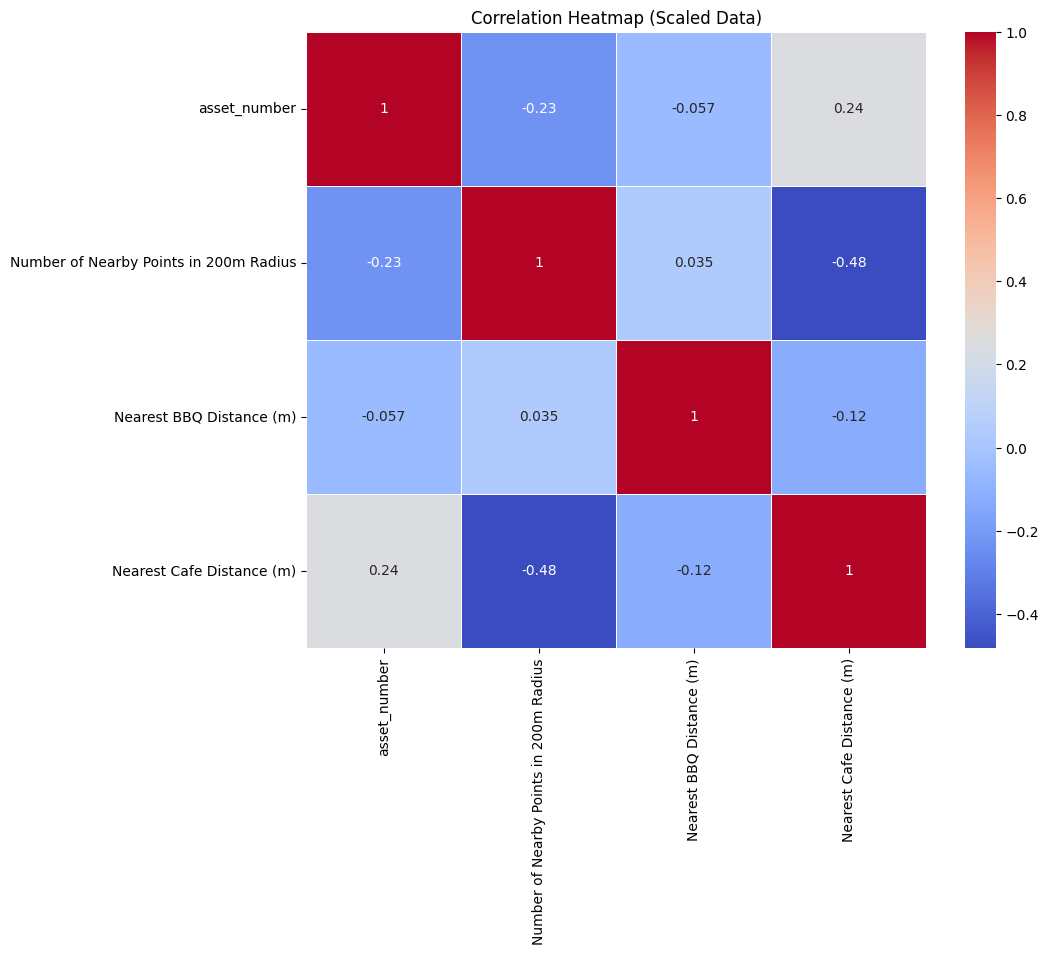

In [65]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific columns for correlation analysis
selected_columns = [
    'asset_number',
    'Number of Nearby Points in 200m Radius',
    'Nearest BBQ Distance (m)',
    'Nearest Cafe Distance (m)'
]

# Subset the DataFrame with the selected columns
selected_data = LitterAna[selected_columns]
# Scale the data using StandardScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)


correlation_matrix = scaled_df.corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap (Scaled Data)")
plt.show()


 ### From the above heat map we can see the main points of corelation which will be between : 
 #### 1. assest numbers and Nearest Cafe Distance(m)
 #### 2. assest numbers and Nearest BBQ Distance(m)
 #### 3. assest numbers and Number of Nearby Points in a 200m Radius
 #### This tells us that the information given does have corelation between the cafe data set compared to the BBQ one.
 
 

## Linear Regression ( NOT COMPLEATE ) 


In [100]:
features = ['Number of Nearby Points in 200m Radius'] 
target = 'asset_number'
X = LitterAna[features]
y = LitterAna[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#NOT GOOD -  R² of -0.1605 suggests that the model does not perform well
#Mean Squared Error: 0.0995187716535623 is good===============IGNORE=============
    

Mean Squared Error: 34252754697.803337
R-squared: 0.16059394490802192


In [102]:
# Assuming you have a trained model named 'model'
# and you want to make predictions for a new set of feature values
new_data = pd.DataFrame({
    'Number of Nearby Points in 200m Radius': [300]
})

# Make predictions
predictions = model.predict(new_data)

# Print or use the predictions as needed
print("Predicted number of assets for nearby points in radius : ",predictions)


Predicted number of assets for nearby points in radius :  [1305535.45591844]
